## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels import robust



#### Step 1.5 − Aux Functions

In [27]:
def dividir_matriz_por_percentagem(matriz, percentagem, seed):
    # Define a seed para a aleatoriedade ser reprodutível
    random.seed(seed)
    
    # Calcula quantas linhas terão na matriz menor
    n_linhas_menor_matriz = int(len(matriz) * percentagem)
    
    # Seleciona aleatoriamente as linhas para a matriz menor
    linhas_selecionadas = random.sample(range(len(matriz)), n_linhas_menor_matriz)
    
    # Cria as matrizes maior e menor
    matriz_menor = [matriz[i] for i in linhas_selecionadas]
    matriz_maior = [matriz[i] for i in range(len(matriz)) if i not in linhas_selecionadas]
    
    return matriz_maior, matriz_menor


#### Step 2 − Load the dataset

In [28]:
# import data:
X_train_full = np.load('X_train.npy')
y_train_full = np.load('y_train.npy')
X_test = np.load('X_test.npy')

X_train, X_val = dividir_matriz_por_percentagem(X_train_full, 0.2, 12345)
print(len(X_train))
print(len(X_val))
y_train, y_val = dividir_matriz_por_percentagem(y_train_full, 0.2, 12345)
print(len(y_train))
print(len(y_val))

outlier_treshold_train = 1.1
outlier_treshold_val = 1.1



160
40
160
40


#### Step 3 − Plot the trainning features and outputs

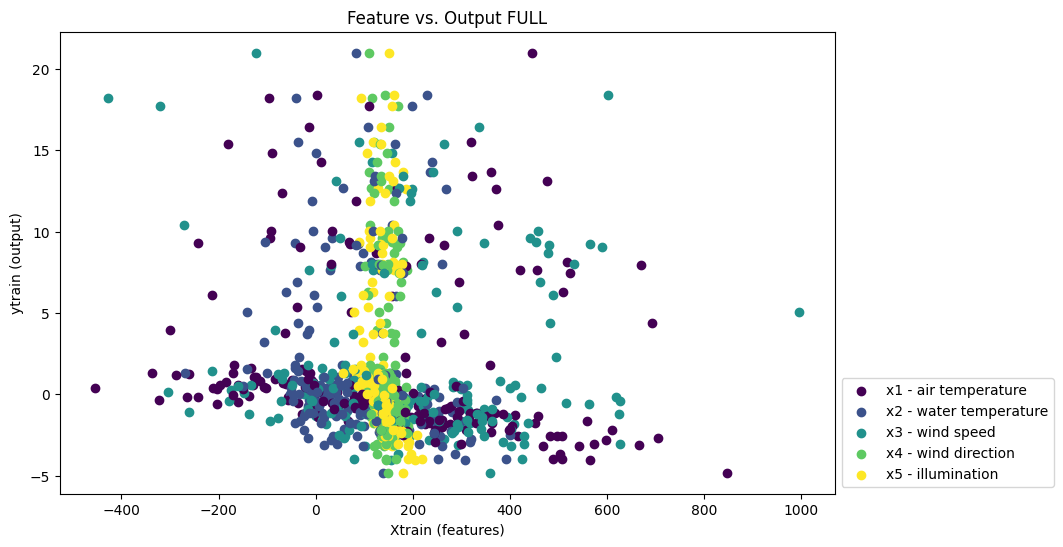

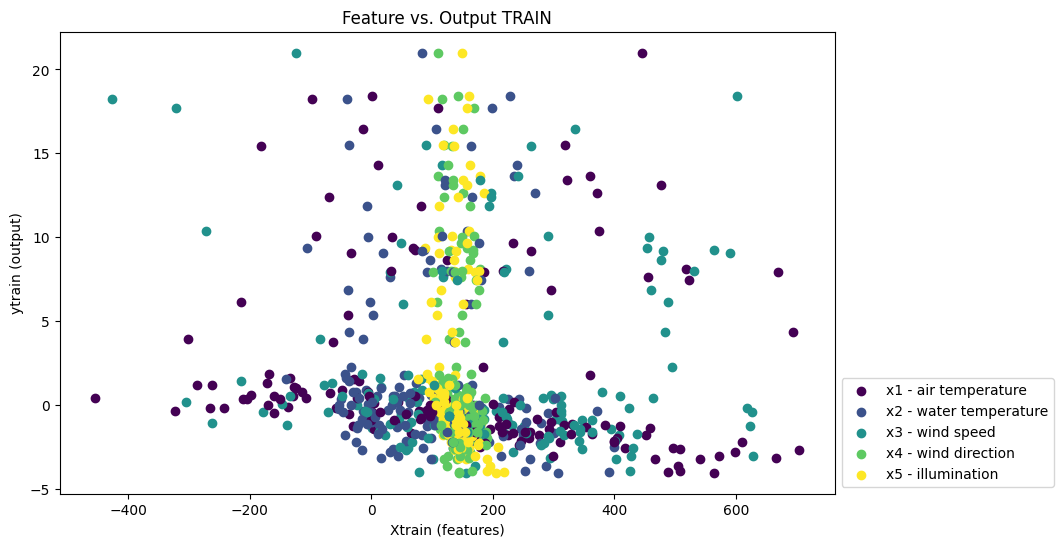

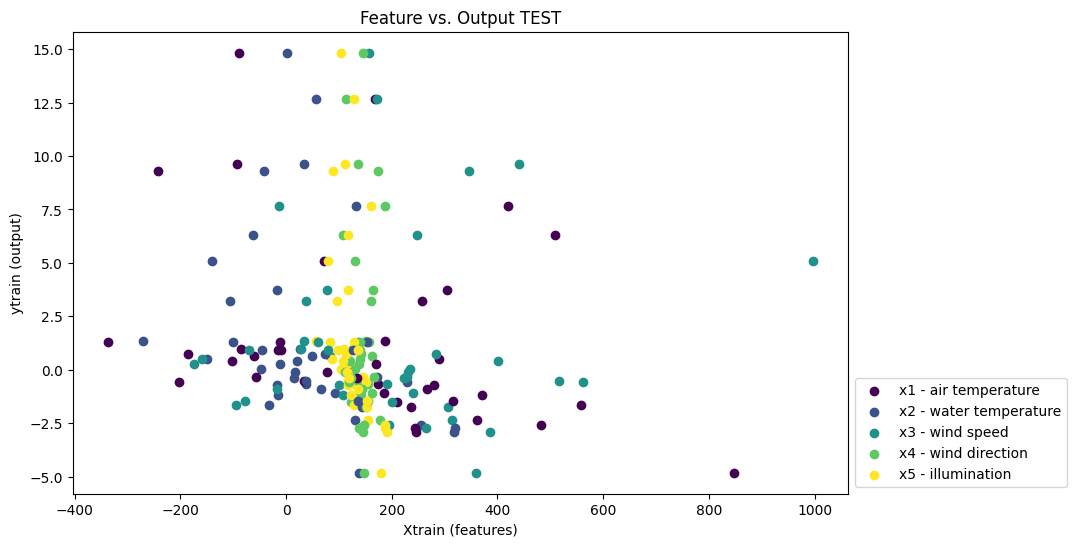

In [29]:
# plot data:

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(10,6))
plt.title('Feature vs. Output FULL')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')
labels = []

labels.append('x1 - air temperature')
labels.append('x2 - water temperature')
labels.append('x3 - wind speed')
labels.append('x4 - wind direction')
labels.append('x5 - illumination')

for s,sample in enumerate(X_train_full):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_full[s], color= colors[f])

plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

plt.figure(figsize=(10,6))
plt.title('Feature vs. Output TRAIN')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')


for s,sample in enumerate(X_train):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train[s], color= colors[f])

plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

plt.figure(figsize=(10,6))
plt.title('Feature vs. Output TEST')
plt.xlabel('Xtrain (features)')
plt.ylabel('ytrain (output)')


for s,sample in enumerate(X_val):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_val[s], color= colors[f])



plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 4.1 - Oulier removal - modified Z-scores 

Shape of outliers: (160,)
Shape of inliers: (160,)
119
160


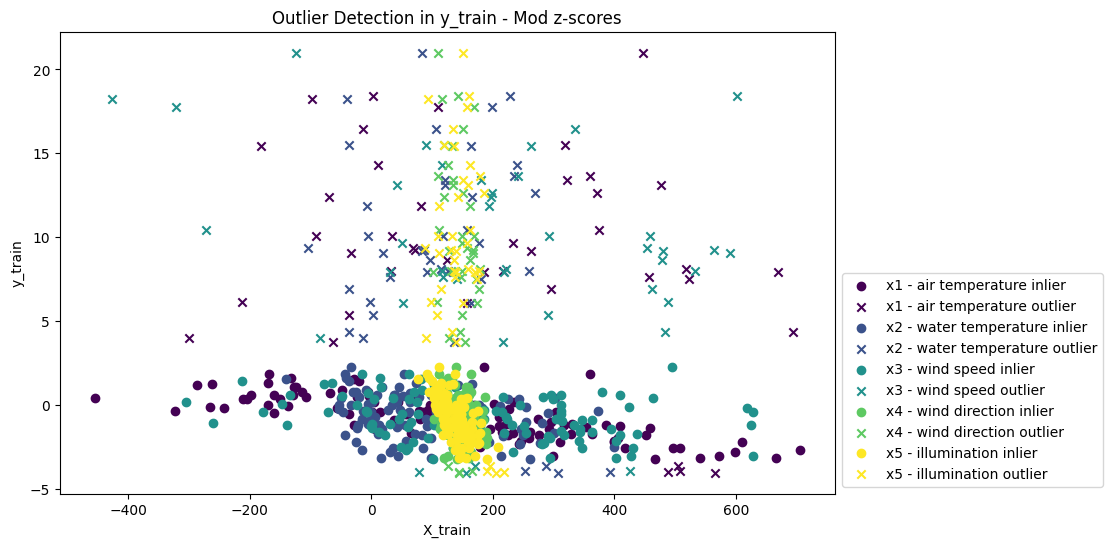

29
40


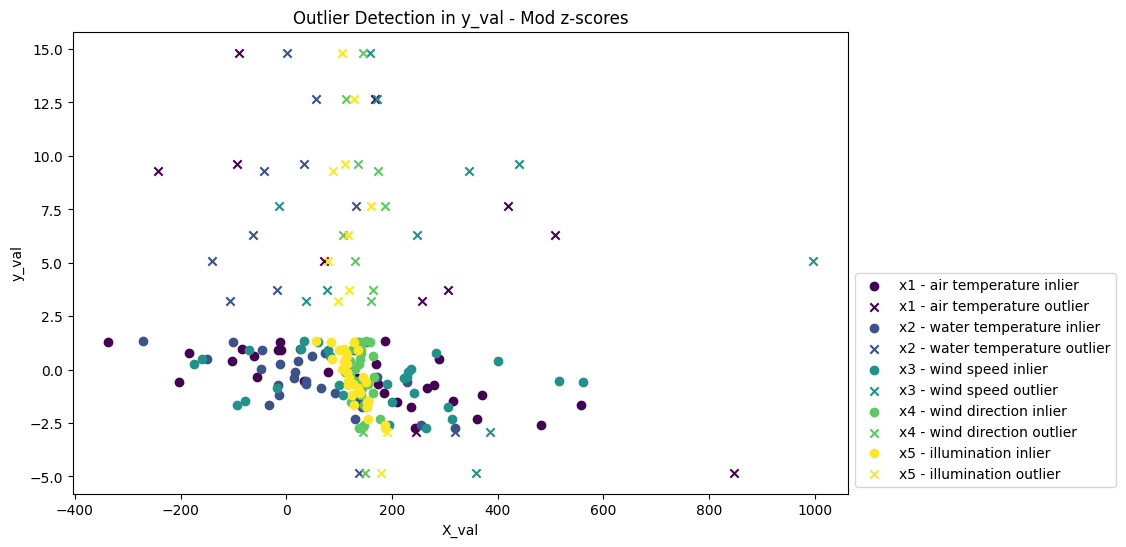

In [30]:

X_train = np.array(X_train)
y_train = np.array(y_train)

#print("Shape of y_train:", y_train.shape)

median_y = np.median(y_train)
mad_y = robust.mad(y_train)

mod_z_scores = 0.6745 * (y_train - median_y) / mad_y

outliers = np.abs(mod_z_scores) >= outlier_treshold_train
inliers = np.logical_not(outliers)
print("Shape of outliers:", outliers.shape)
print("Shape of inliers:", inliers.shape)

#outliers = outliers.ravel()
#inliers = inliers.ravel()







#print("Shape of inliers:", inliers.shape)
#print("Shape of X_train:", X_train.shape)

X_train_clean_z = X_train[inliers]
y_train_clean_z = y_train[inliers]
#X_train_clean = X_train[inliers] 

print(y_train_clean_z.size)
print (y_train.size)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.get_cmap('viridis')
colors = colormap(gradient)

labels_outliers =[]

# Step 6: Plotting the data
plt.figure(figsize=(10, 6))


for f, feature in enumerate(X_train.T):  # Transpose to iterate features
    plt.scatter(feature[inliers], y_train[inliers], color=colors[f], marker='o')
    plt.scatter(feature[outliers], y_train[outliers], color=colors[f], marker='x')



labels_outliers.append('x1 - air temperature inlier')
labels_outliers.append('x1 - air temperature outlier')
labels_outliers.append('x2 - water temperature inlier')
labels_outliers.append('x2 - water temperature outlier')
labels_outliers.append('x3 - wind speed inlier')
labels_outliers.append('x3 - wind speed outlier')
labels_outliers.append('x4 - wind direction inlier')
labels_outliers.append('x4 - wind direction outlier')
labels_outliers.append('x5 - illumination inlier')
labels_outliers.append('x5 - illumination outlier')

plt.title('Outlier Detection in y_train - Mod z-scores')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend(labels_outliers, loc='lower left', bbox_to_anchor=(1,0))
plt.show()



# Assuming X_val is already defined and possibly a list
# Convert X_val to a NumPy array if it's a list
X_val = np.array(X_val)

# Assuming y_val is defined as a list, convert it to a NumPy array
y_val = np.array(y_val)

# Step 1: Calculate median and MAD
median_y = np.median(y_val)
mad_y = robust.mad(y_val)

# Step 2: Calculate modified Z-scores
mod_z_scores = 0.6745 * (y_val - median_y) / mad_y

# Step 3: Identify outliers and inliers
outlier = np.abs(mod_z_scores) >= outlier_treshold_val
inlier = ~outlier  # Use ~ for logical NOT


# Step 4: Clean data by inliers
X_val_clean_z = X_val[inlier]
y_val_clean_z = y_val[inlier]

print(y_val_clean_z.size)
print (y_val.size)


# Step 5: Plotting the data
num_colors = 5  # Number of colors for features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.get_cmap('viridis')
colors = colormap(gradient)

plt.figure(figsize=(10, 6))

for f, feature in enumerate(X_val.T):  # Transpose to iterate features
    plt.scatter(feature[inlier], y_val[inlier], color=colors[f], marker='o', label='Inliers' if f == 0 else "")
    plt.scatter(feature[outlier], y_val[outlier], color=colors[f], marker='x', label='Outliers' if f == 0 else "")



plt.title('Outlier Detection in y_val - Mod z-scores')
plt.xlabel('X_val')
plt.ylabel('y_val')
plt.legend(labels_outliers, loc='lower left', bbox_to_anchor=(1,0))
plt.show()







#### Step 4 - Outlier Removal - RANSAC



39
121


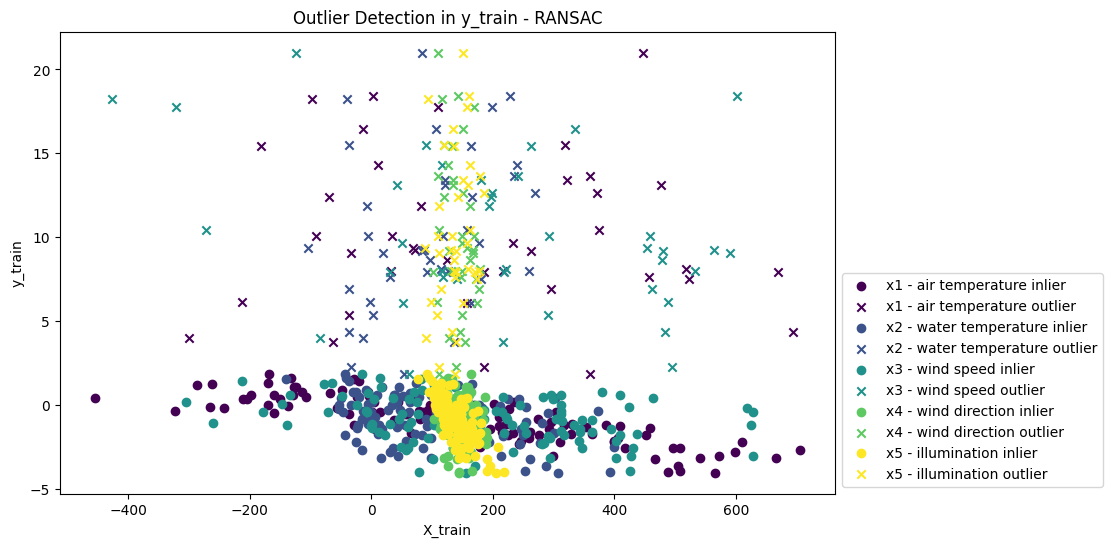

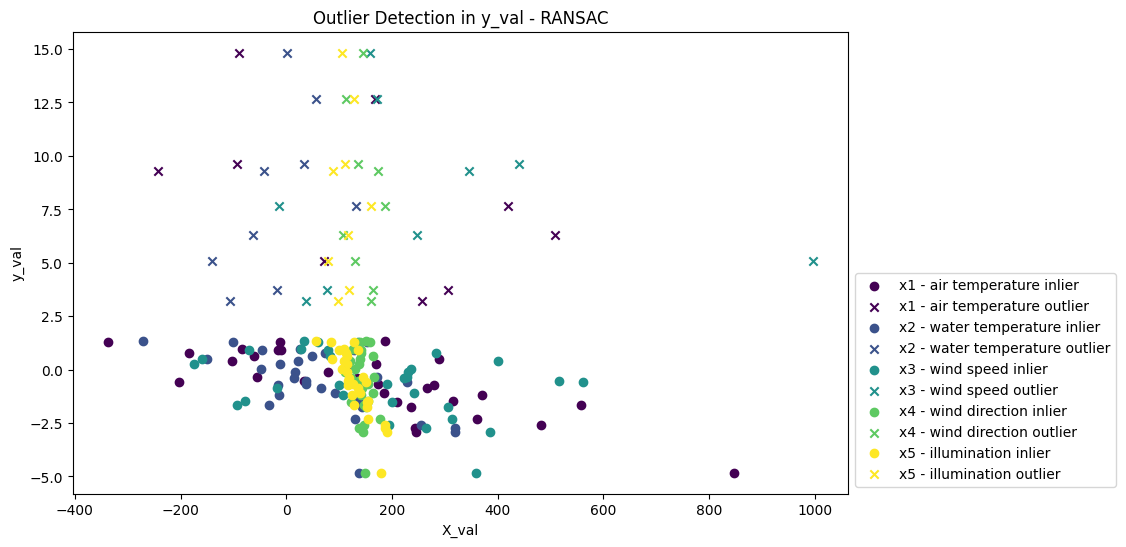

In [31]:
from sklearn.neighbors import LocalOutlierFactor
X_train = np.array(X_train)
y_train = np.array(y_train)


#Ransac Model
ransac_train = RANSACRegressor(estimator=LinearRegression())

#ransac to our data
ransac_train.fit(X_train, y_train)
inlier_mask_train_ran = ransac_train.inlier_mask_
outlier_mask_train_ran = ~inlier_mask_train_ran

#y_pred_ransac = ransac_train.predict(X_val)

X_train_clean_ran= X_train[inlier_mask_train_ran]
y_train_clean_ran = y_train[inlier_mask_train_ran]


ransac_val = RANSACRegressor(estimator=LinearRegression())

#ransac to our data
ransac_val.fit(X_val, y_val)
inlier_mask_val_ran = ransac_val.inlier_mask_
outlier_mask_val_ran = ~inlier_mask_val_ran

#y_pred_ransac = ransac_train.predict(X_val)

X_val_clean_ran= X_val[inlier_mask_val_ran]
y_val_clean_ran = y_val[inlier_mask_val_ran]




num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

# Plot the results




plt.figure(figsize=(10,6))


plt.title('Outlier Detection in y_train - RANSAC')


print(np.count_nonzero(outlier_mask_train_ran == True))
print(np.count_nonzero(inlier_mask_train_ran == True))
# Plot inliers and outliers
cont=0
for f, feature in enumerate(X_train.T):  # Transpose to iterate features
    plt.scatter(feature[inlier_mask_train_ran], y_train[inlier_mask_train_ran], color=colors[f], marker='o')
    plt.scatter(feature[outlier_mask_train_ran], y_train[outlier_mask_train_ran], color=colors[f], marker='x')
    


plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend(labels_outliers, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

plt.figure(figsize=(10,6))


plt.title('Outlier Detection in y_val - RANSAC')

for f, feature in enumerate(X_val.T):  # Transpose to iterate features
    plt.scatter(feature[inlier_mask_val_ran], y_val[inlier_mask_val_ran], color=colors[f], marker='o')
    plt.scatter(feature[outlier_mask_val_ran], y_val[outlier_mask_val_ran], color=colors[f], marker='x')



plt.xlabel('X_val')
plt.ylabel('y_val')
plt.legend(labels_outliers, loc='lower left', bbox_to_anchor=(1,0))
plt.show()





#### Step 5 − Scaling


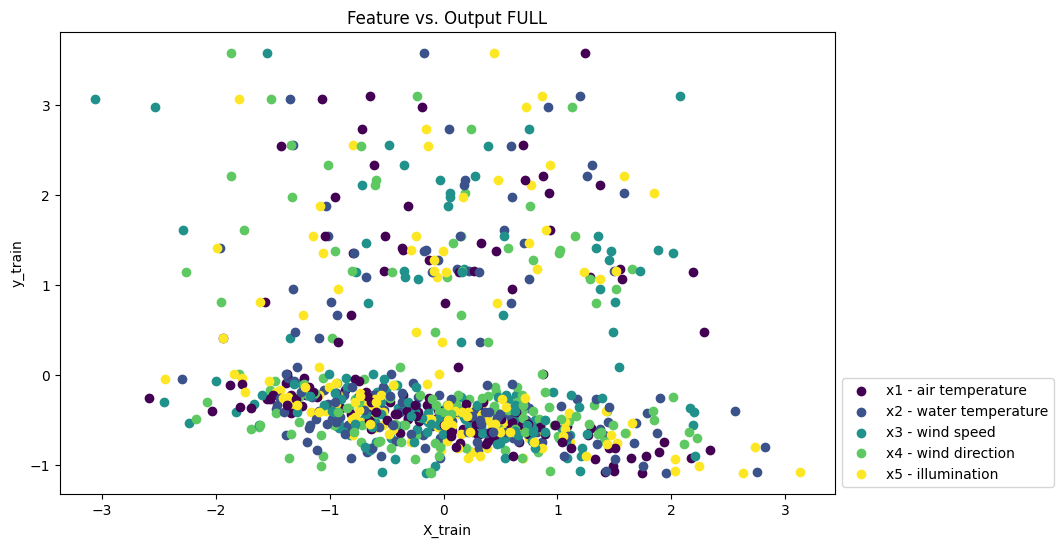

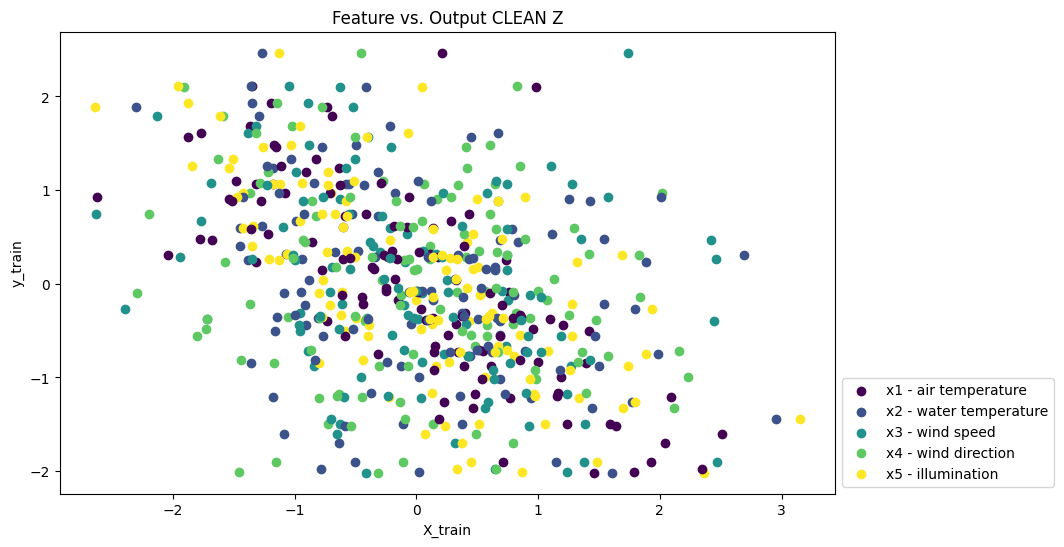

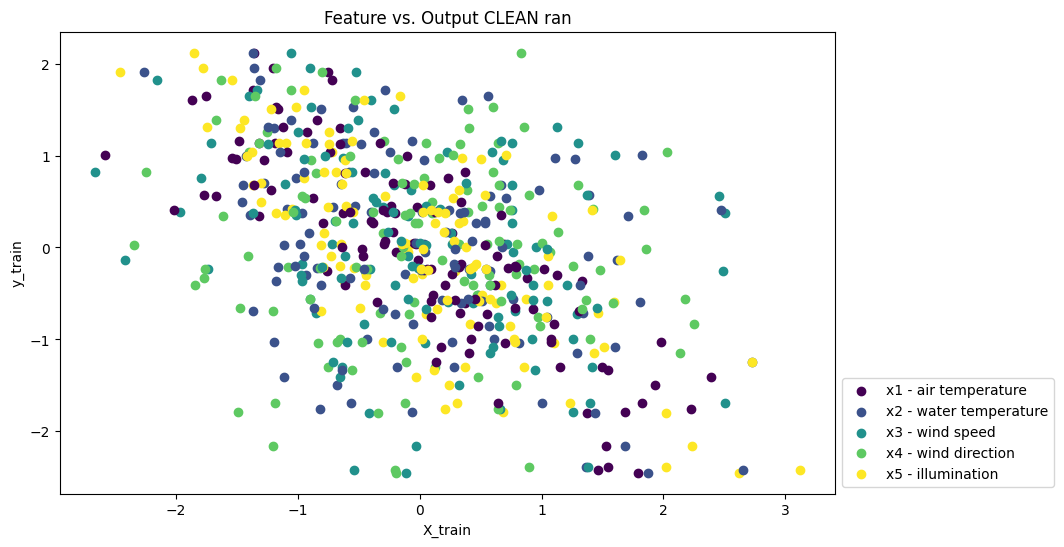

In [32]:

#for correct scaling
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1,1)

#Scaling all of the data
scaler_X = StandardScaler()
X_val_scaled = scaler_X.fit_transform(X_val)  
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.fit_transform(y_val)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(10,6))
plt.title('Feature vs. Output FULL')
plt.xlabel('X_train')
plt.ylabel('y_train')


#plotting scaled data
for s,sample in enumerate(X_train_scaled):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_scaled[s], color= colors[f])

plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()


#same scaling, for after outlier removal
y_train_clean = np.array(y_train_clean_z).reshape(-1, 1)
y_val_clean = np.array(y_val_clean_z).reshape(-1, 1)


X_val_scaled_clean = scaler_X.fit_transform(X_val_clean_z)  
X_train_clean_scaled = scaler_X.fit_transform(X_train_clean_z)
X_test_scaled = scaler_X.transform(X_test)

y_train_clean_scaled = scaler_y.fit_transform(y_train_clean)
y_val_scaled = scaler_y.fit_transform(y_val_clean)

num_colors = 5 # nr_colors = nr_features
gradient = np.linspace(0, 1, num_colors)
colormap = plt.colormaps['viridis']
colors = colormap(gradient)

plt.figure(figsize=(10,6))
plt.title('Feature vs. Output CLEAN Z')
plt.xlabel('X_train')
plt.ylabel('y_train')


#scaled outlier removal
for s,sample in enumerate(X_train_clean_scaled):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_clean_scaled[s], color= colors[f])

plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

y_train_clean = np.array(y_train_clean_ran).reshape(-1, 1)
y_val_clean = np.array(y_val_clean_z).reshape(-1, 1)


X_val_scaled_clean_ran = scaler_X.fit_transform(X_val_clean_ran)  
X_train_clean_scaled_ran = scaler_X.fit_transform(X_train_clean_ran)
X_test_scaled = scaler_X.transform(X_test)

y_train_clean_scaled_ran = scaler_y.fit_transform(y_train_clean)
y_val_scaled_ran = scaler_y.fit_transform(y_val_clean)


plt.figure(figsize=(10,6))
plt.title('Feature vs. Output CLEAN ran')
plt.xlabel('X_train')
plt.ylabel('y_train')


#scaled outlier removal
for s,sample in enumerate(X_train_clean_scaled_ran):
    for f, feature in enumerate(sample):
        plt.scatter(feature, y_train_clean_scaled_ran[s], color= colors[f])

plt.legend(labels, loc='lower left', bbox_to_anchor=(1,0))
plt.show()

#### Step 6 − Linear Regression 


In [33]:
# models:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model.predict(X_val_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_linear_full = mean_squared_error(y_val, y_pred)
print(f"Ridge MSE - Full data: {mse_linear_full}")


# models:
model_clean = LinearRegression()
model_clean.fit(X_train_clean_scaled, y_train_clean_scaled)
y_pred_scaled = model_clean.predict(X_val_scaled_clean)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_linear = mean_squared_error(y_val_clean, y_pred)
print(f"Ridge MSE - Z outlier: {mse_linear}")


model_ran = LinearRegression()
model_ran.fit(X_train_clean_scaled_ran, y_train_clean_scaled_ran)
y_pred_scaled = model_ran.predict(X_val_scaled_clean_ran)

y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_linear_ran = mean_squared_error(y_val_clean_ran, y_pred)
print(f"Ridge MSE - RANSAC outlier: {mse_linear_ran}")





Ridge MSE - Full data: 19.80847601521443
Ridge MSE - Z outlier: 0.06298610858414072
Ridge MSE - RANSAC outlier: 0.11063624258114693


#### Step 6 − Regularization with Mod z outlier


In [34]:
from sklearn.linear_model import ElasticNet

# models:
#ridge = Ridge(alpha=0.1)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
ridge_cv = GridSearchCV(Ridge(max_iter=10000), ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_clean_scaled, y_train_clean_scaled)

#Lasso = Lasso(alpha=1)


y_pred_ridge_scaled= ridge_cv.predict(X_val_scaled_clean)
#print(y_pred_ridge_scaled)

y_pred_ridge = scaler_y.inverse_transform(y_pred_ridge_scaled)

mse_ridge = mean_squared_error(y_val_clean_z, y_pred_ridge)
print(f"Ridge MSE: {mse_ridge}  Best Ridge alpha: {ridge_cv.best_params_}")



# For Lasso
lasso_params = {'alpha': [ 0.001, 0.01, 0.1, 1.0, 10, 100]}
lasso_cv = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=10, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_clean_scaled, y_train_clean_scaled)

y_pred_lasso_scaled= lasso_cv.predict(X_val_scaled_clean)
y_pred_lasso_scaled = y_pred_lasso_scaled.reshape(-1, 1)

y_pred_lasso = scaler_y.inverse_transform(y_pred_lasso_scaled)

# Calculate MSE for Lasso
mse_lasso = mean_squared_error(y_val_clean_z, y_pred_lasso)
print(f"Lasso MSE: {mse_lasso}  Best Lasso alpha: {lasso_cv.best_params_}")


# Define parameter grid for ElasticNet
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create GridSearchCV object
elastic_cv = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=10, scoring='neg_mean_squared_error')

# Fit the model
elastic_cv.fit(X_train_clean_scaled, y_train_clean_scaled)


# Predict using the validation set with the best model
y_pred_elastic_scaled = elastic_cv.predict(X_val_scaled_clean)

# Inverse transform the predictions if necessary (assuming you're scaling the targets)
# y_pred_elastic = scaler.inverse_transform(y_pred_elastic_scaled.reshape(-1, 1))

# Calculate MSE
mse_elastic = mean_squared_error(y_val_clean_z, y_pred_elastic_scaled)

# Print MSE
print(f"ElasticNet MSE: {mse_elastic}  Best ElasticNet params: {elastic_cv.best_params_}")

print(f"Linear MSE: {mse_linear}")









Ridge MSE: 0.052941593524517855  Best Ridge alpha: {'alpha': 0.1}
Lasso MSE: 0.05101829746816915  Best Lasso alpha: {'alpha': 0.001}
ElasticNet MSE: 0.21822746478916843  Best ElasticNet params: {'alpha': 0.001, 'l1_ratio': 0.9}
Linear MSE: 0.06298610858414072


#### Step 6 − Regularization with RANSAC outlier

In [35]:
from sklearn.linear_model import ElasticNet

# models:
#ridge = Ridge(alpha=0.1)

ridge_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_clean_scaled_ran, y_train_clean_scaled_ran)

#Lasso = Lasso(alpha=1)


y_pred_ridge_scaled_ran= ridge_cv.predict(X_val_scaled_clean_ran)
#print(y_pred_ridge_scaled)

y_pred_ridge_ran = scaler_y.inverse_transform(y_pred_ridge_scaled_ran)

mse_ridge = mean_squared_error(y_val_clean_ran, y_pred_ridge_ran)
print(f"Ridge MSE: {mse_ridge}  Best Ridge alpha: {ridge_cv.best_params_}")



# For Lasso
lasso_params = {'alpha': [ 0.001, 0.01, 0.1, 1.0, 10, 100]}
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_clean_scaled_ran, y_train_clean_scaled_ran)

y_pred_lasso_scaled_ran= lasso_cv.predict(X_val_scaled_clean_ran)
y_pred_lasso_scaled_ran = y_pred_lasso_scaled_ran.reshape(-1, 1)

y_pred_lasso_ran = scaler_y.inverse_transform(y_pred_lasso_scaled_ran)

# Calculate MSE for Lasso
mse_lasso = mean_squared_error(y_val_clean_ran, y_pred_lasso_ran)
print(f"Lasso MSE: {mse_lasso}  Best Lasso alpha: {lasso_cv.best_params_}")


# Define parameter grid for ElasticNet
elastic_params = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Create GridSearchCV object
elastic_cv = GridSearchCV(ElasticNet(), elastic_params, cv=10, scoring='neg_mean_squared_error')

# Fit the model
elastic_cv.fit(X_train_clean_scaled_ran, y_train_clean_scaled_ran)


# Predict using the validation set with the best model
y_pred_elastic_scaled_ran = elastic_cv.predict(X_val_scaled_clean_ran)

# Inverse transform the predictions if necessary (assuming you're scaling the targets)
# y_pred_elastic = scaler.inverse_transform(y_pred_elastic_scaled.reshape(-1, 1))

# Calculate MSE
mse_elastic = mean_squared_error(y_val_clean_ran, y_pred_elastic_scaled_ran)

# Print MSE
print(f"ElasticNet MSE: {mse_elastic}  Best ElasticNet params: {elastic_cv.best_params_}")

print(f"Linear MSE: {mse_linear}")









Ridge MSE: 0.11071048029951944  Best Ridge alpha: {'alpha': 0.001}
Lasso MSE: 0.11501881220232453  Best Lasso alpha: {'alpha': 0.001}
ElasticNet MSE: 0.5370288600350483  Best ElasticNet params: {'alpha': 0.001, 'l1_ratio': 0.9}
Linear MSE: 0.06298610858414072


/home/olivas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.577e-01, tolerance: 1.600e-02
  model = cd_fast.enet_coordinate_descent(


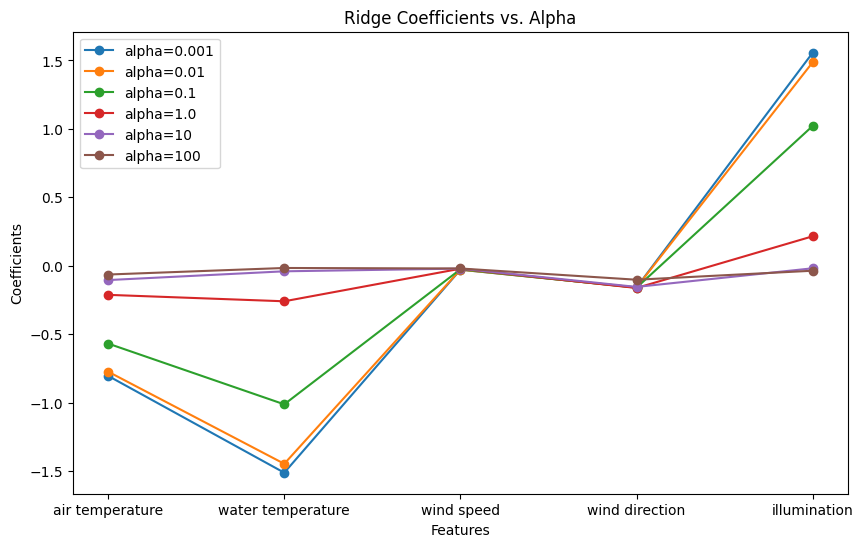

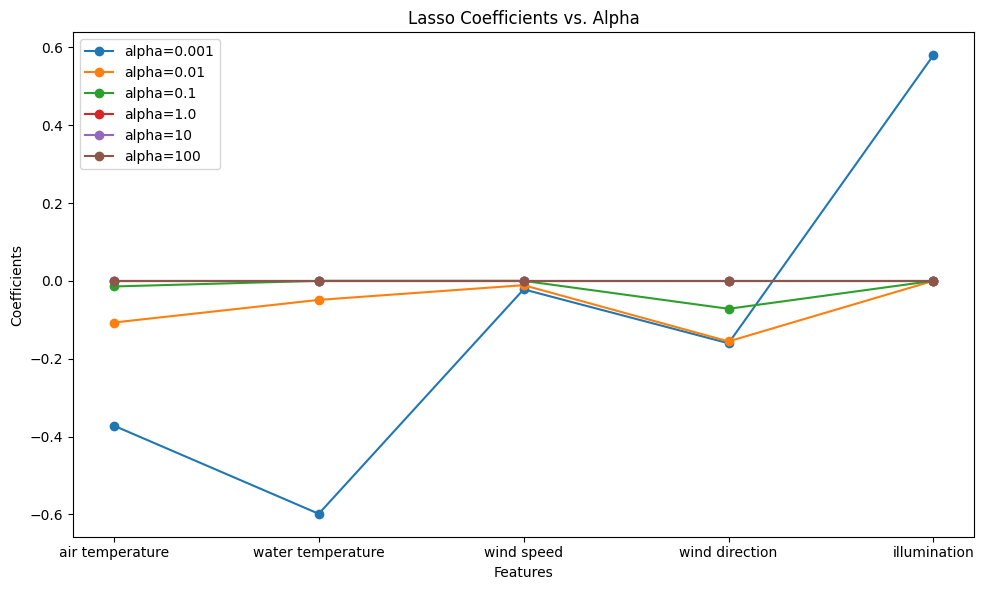

In [36]:
# Example data: replace with actual feature names
feature_names = ['air temperature', 'water temperature', 'wind speed', 'wind direction', 'illumination']
alphas = [0.001, 0.01, 0.1, 1.0, 10, 100]

# Initialize lists to store coefficients
coeffs_ridge = []
coeffs_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train_scaled)
    coeffs_ridge.append(ridge.coef_.flatten())

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train_scaled)
    coeffs_lasso.append(lasso.coef_)

# Convert to numpy arrays for easier plotting
coeffs_ridge = np.array(coeffs_ridge)
coeffs_lasso = np.array(coeffs_lasso)


plt.figure(figsize=(10, 6))

# Plot Ridge coefficients

for i, alpha in enumerate(alphas):
    plt.plot(feature_names, coeffs_ridge[i], marker='o', label=f'alpha={alpha}')
plt.title('Ridge Coefficients vs. Alpha')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()



plt.figure(figsize=(10, 6))
# Plot Lasso coefficients

for i, alpha in enumerate(alphas):
    plt.plot(feature_names, coeffs_lasso[i], marker='o', label=f'alpha={alpha}')
plt.title('Lasso Coefficients vs. Alpha')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.legend()


plt.tight_layout()
plt.show()

#### Step 6 − Train the best model using the fit() method

In [37]:
# create the best model (with alpha = best alpha):
best_Lasso = Lasso(lasso_cv.best_params_['alpha'])
# train the best model with the trainning data:


print(X_train_clean_scaled.shape)
print(X_val_scaled_clean.shape)

print(y_train_clean_scaled.shape)
print(y_val_scaled.shape)

X_train_clean_scaled=np.vstack((X_train_clean_scaled, X_val_scaled_clean))
y_train_clean_scaled = np.vstack((y_train_clean_scaled, y_val_scaled))

print(X_train_clean_scaled.shape)
print(y_train_clean_scaled.shape)
best_Lasso.fit(X_train_clean_scaled, y_train_clean_scaled)

(119, 5)
(29, 5)
(119, 1)
(29, 1)
(148, 5)
(148, 1)


Lasso(alpha=0.001)

#### Step 7 − Predict the output for the testing data

In [38]:

y_pred_lasso_scaled= best_Lasso.predict(X_test_scaled)

y_pred_lasso_scaled = y_pred_lasso_scaled.reshape(-1, 1)
#print(y_pred_ridge_scaled)

y_pred_lasso = scaler_y.inverse_transform(y_pred_lasso_scaled)
print(y_pred_lasso.shape)
y_pred_lasso=y_pred_lasso.flatten()
print(y_pred_lasso.shape)

(200, 1)
(200,)


In [39]:
# save ypred_test as .txt file:
np.save('ytest_pred', y_pred_lasso)